In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
from thinning import sample_hawkes_process_thinning
from utils import exp_kernel, constant_background, plot_counting_process
from time_rescaling import rescale_times
from clustering import simulate_homogeneous_poisson_process, simulate_inhomogeneous_poisson_process

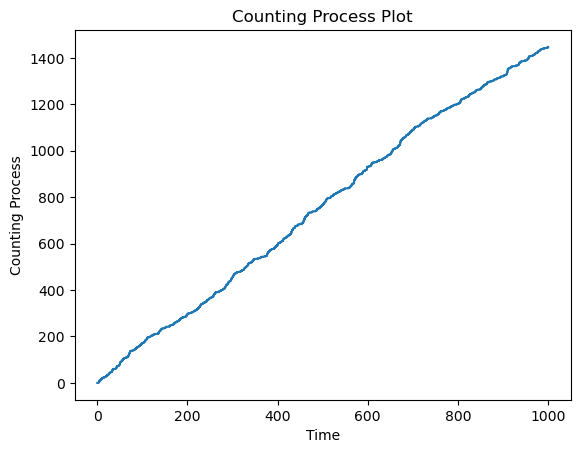

In [8]:
hawkes_realisation = sample_hawkes_process_thinning(1000, constant_background, exp_kernel)
plot_counting_process(hawkes_realisation)

In [9]:
taus_list = rescale_times(hawkes_realisation)

z_list = [(1 - np.exp(-tau)) for tau in taus_list]

c:\Users\ethan\OneDrive - University of Bristol\Maths\Year 4\Project\hawkes_project\utils.py:40: RuntimeWarning: overflow encountered in exp
  return np.where(t < 0, 0, alpha * np.exp(-delta * t))


(array([0.70539213, 0.78837944, 0.71230774, 0.89902918, 1.03042576,
        1.01659454, 1.11341307, 1.1410755 , 1.25864086, 1.34162817]),
 array([0.        , 0.09993118, 0.19986237, 0.29979355, 0.39972473,
        0.49965592, 0.5995871 , 0.69951829, 0.79944947, 0.89938065,
        0.99931184]),
 <BarContainer object of 10 artists>)

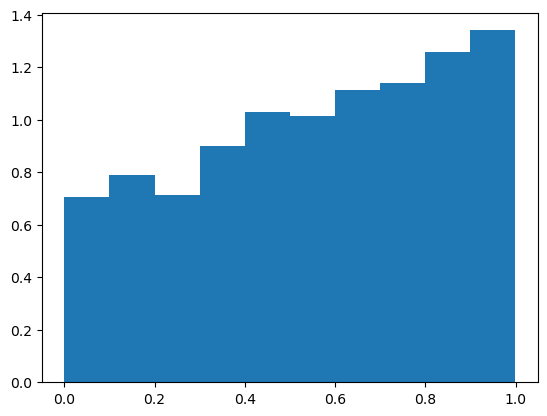

In [10]:
plt.hist(z_list, bins=10, density=True)

This is probably wrong

In [46]:
num_samples = 1000
max_T=100
for i in range(num_samples):
    T_list = simulate_homogeneous_poisson_process(10, max_T)
    if i==0:
        lambda_bar = len(T_list)/max_T
        # print(len(T_list), lambda_bar)
    else:
        lambda_bar += len(T_list)/max_T
        lambda_bar /= 2
print(lambda_bar)

0.10955743075145907


Think there is issue with simulating homogeneous poisson process, since not getting right expected number of events.

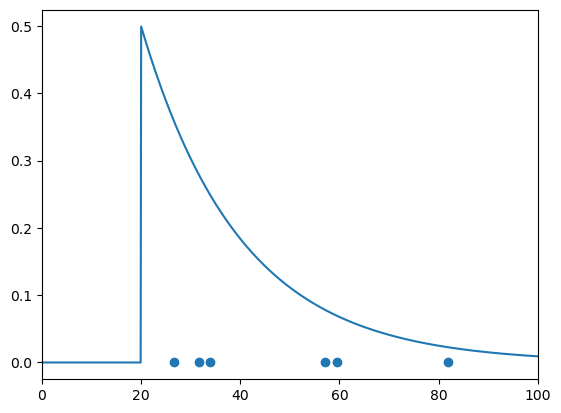

6

In [52]:
rate = lambda t: exp_kernel(t-20, alpha=0.5, delta=0.05)
# rate = lambda t: exp_kernel(t)

T_list = simulate_inhomogeneous_poisson_process(rate, 100, 20)

plt.scatter(T_list, len(T_list)*[0])
x_points = np.linspace(0, 100, 1000)
plt.plot(x_points, [rate(x) for x in x_points])
plt.xlim(0, 100)
plt.show()

In [57]:
num_samples = 10000
num_events = np.zeros(num_samples)
for i in range(num_samples):
    rate = lambda t: exp_kernel(t-20, alpha=0.5, delta=0.05)    

    T_list = simulate_inhomogeneous_poisson_process(rate, 100, 20)

    num_events[i] = len(T_list)
print(np.mean(num_events))

9.8095


This is great! Expected number of offspring from one immigrant should be $\alpha / \delta$ (this is the branching factor $n^*$), which here is equal to 10.

Next add clustering code.